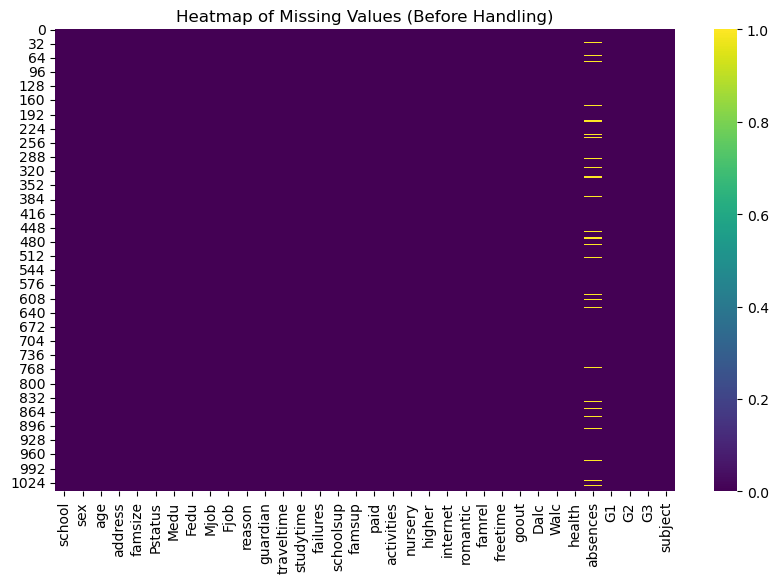


📋 MISSING VALUES BEFORE HANDLING:
school         0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences      57
G1             0
G2             0
G3             0
subject        0
dtype: int64

📋 MISSING VALUES AFTER HANDLING:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
inte

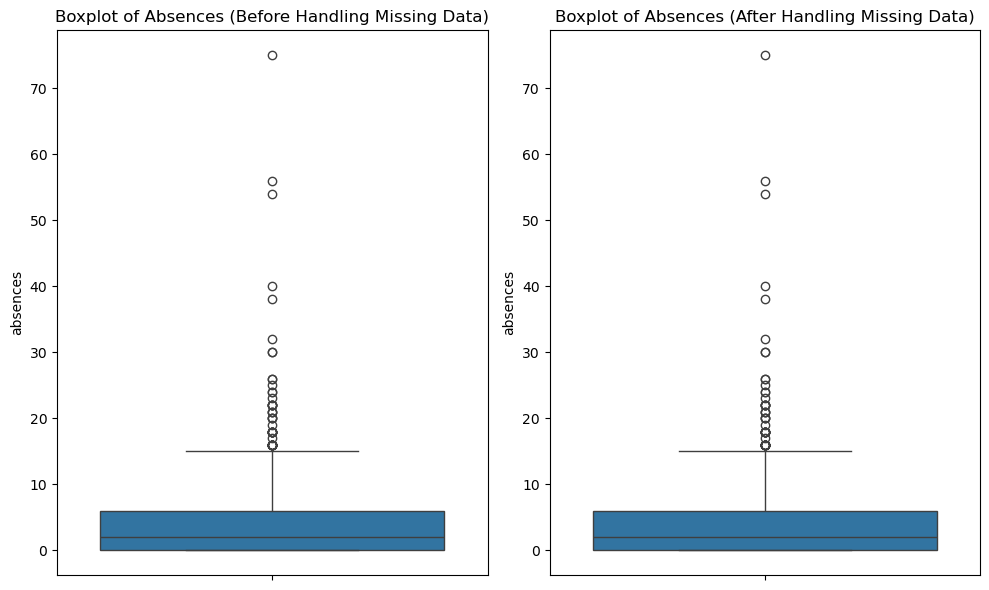

In [1]:
# all member

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Simulate missing data for demonstration (e.g., introduce 5% missing values in 'absences')
np.random.seed(42)  # For reproducibility
mask = np.random.random(df['absences'].size) < 0.05
df_with_missing = df.copy()
df_with_missing.loc[mask, 'absences'] = np.nan

# 1. EDA Visualization Before Handling Missing Data (Heatmap of missing values)
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values (Before Handling)')
plt.show()

# Interpretation: The heatmap highlights the presence of missing values in 'absences', indicating where data is incomplete.

# 2. Show Implementation Output (Check missing values before and after)
print("\n📋 MISSING VALUES BEFORE HANDLING:")
print(df_with_missing.isnull().sum())

# Apply imputation (replace missing values with median)
df_handled = df_with_missing.copy()
df_handled['absences'] = df_handled['absences'].fillna(df_handled['absences'].median())

# 3. Show Implementation Output (Check missing values after handling)
print("\n📋 MISSING VALUES AFTER HANDLING:")
print(df_handled.isnull().sum())

# 4. EDA Visualization After Handling Missing Data (Boxplot of 'absences' to show effect)
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_with_missing['absences'].dropna())
plt.title('Boxplot of Absences (Before Handling Missing Data)')
plt.subplot(1, 2, 2)
sns.boxplot(data=df_handled['absences'])
plt.title('Boxplot of Absences (After Handling Missing Data)')
plt.tight_layout()
plt.show()

# Interpretation: The boxplots show the distribution of 'absences' before (with gaps due to missing data) and after imputation 
# (filled with median, maintaining the overall distribution), ensuring the dataset is usable for further analysis.
# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('handling_missing_data_boxplot.png')

📝 CATEGORICAL COLUMNS: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']

✅ 'Mjob' ENCODING MAPPING:
  at_home -> 0
  health -> 1
  other -> 2
  services -> 3
  teacher -> 4

📋 DATASET AFTER ENCODING (First 5 rows of categorical columns):
   school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0       0    0        1        0        0     0     4       0         1   
1       0    0        1        0        1     0     2       0         0   
2       0    0        1        1        1     0     2       2         1   
3       0    0        1        0        1     1     3       1         1   
4       0    0        1        0        1     2     2       1         0   

   schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  \
0          1       0     0           0        1       1         0         0   
1          0

<Figure size 640x480 with 0 Axes>

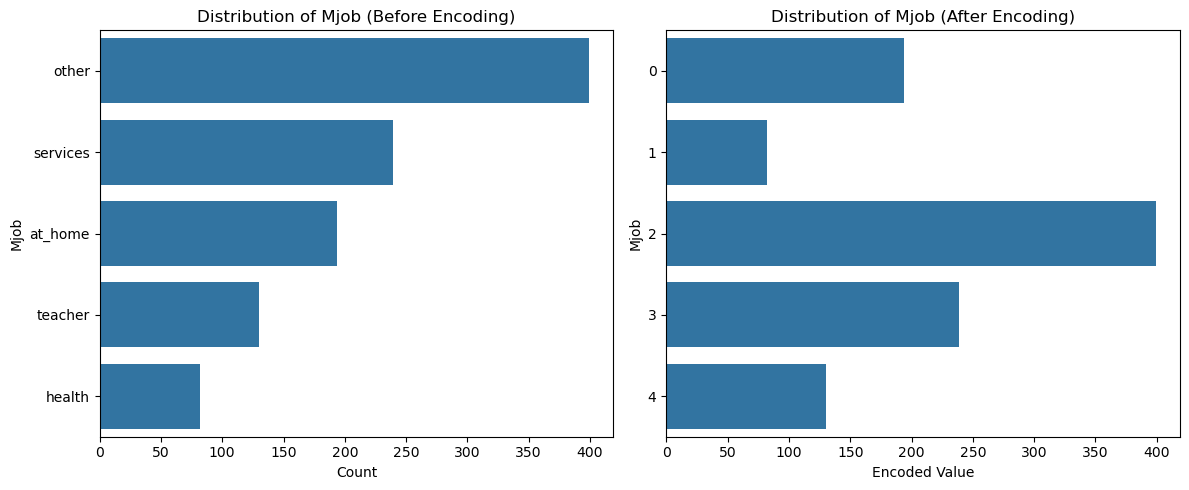

In [2]:
# Member 1: IT24103648 RANASINGHA R.A.D.S
# Preprocessing Technique: Encoding Categorical Variables
# Explanation: Encoding categorical variables converts non-numerical data (e.g., 'Mjob', 'sex') into numerical format using 
# techniques like Label Encoding, enabling their use in machine learning models. Label Encoding assigns a unique integer to each category.
# Justification: The dataset contains categorical columns (e.g., 'Mjob', 'Fjob', 'sex') with 18 object-type variables. Encoding is 
# necessary to include these features in numerical analyses or models that require quantitative inputs.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# 1. Identify Categorical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("📝 CATEGORICAL COLUMNS:", list(categorical_columns))

# 2. EDA Visualization Before Encoding (Countplot for 'Mjob' as an example)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(y=df['Mjob'], order=df['Mjob'].value_counts().index)  # Mother's job distribution
plt.title('Distribution of Mjob (Before Encoding)')
plt.xlabel('Count')

# Interpretation: The countplot shows the frequency of each 'Mjob' category (e.g., 'other' is most common), highlighting the need for encoding.

# 3. Apply Encoding (Using Label Encoding)
label_encoders = {}
df_encoded = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoder for potential inverse transformation

# 4. Show Implementation Output (Encoding mapping and first 5 rows)
print("\n✅ 'Mjob' ENCODING MAPPING:")
for i, class_name in enumerate(label_encoders['Mjob'].classes_):
    print(f"  {class_name} -> {i}")

print("\n📋 DATASET AFTER ENCODING (First 5 rows of categorical columns):")
print(df_encoded[categorical_columns].head())

# 5. EDA Visualization After Encoding (Countplot of encoded 'Mjob')
plt.subplot(1, 2, 2)
sns.countplot(y=df_encoded['Mjob'])
plt.title('Distribution of Mjob (After Encoding)')
plt.xlabel('Encoded Value')

# Interpretation: The encoded 'Mjob' countplot retains the same distribution but uses integers (0-4), making it suitable for modeling.
plt.tight_layout()
plt.show()

# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('encoding_categorical_variables.png')


📋 ROWS BEFORE OUTLIER REMOVAL: 1044
📋 ROWS AFTER OUTLIER REMOVAL: 990
📋 NUMBER OF OUTLIERS REMOVED: 54


<Figure size 640x480 with 0 Axes>

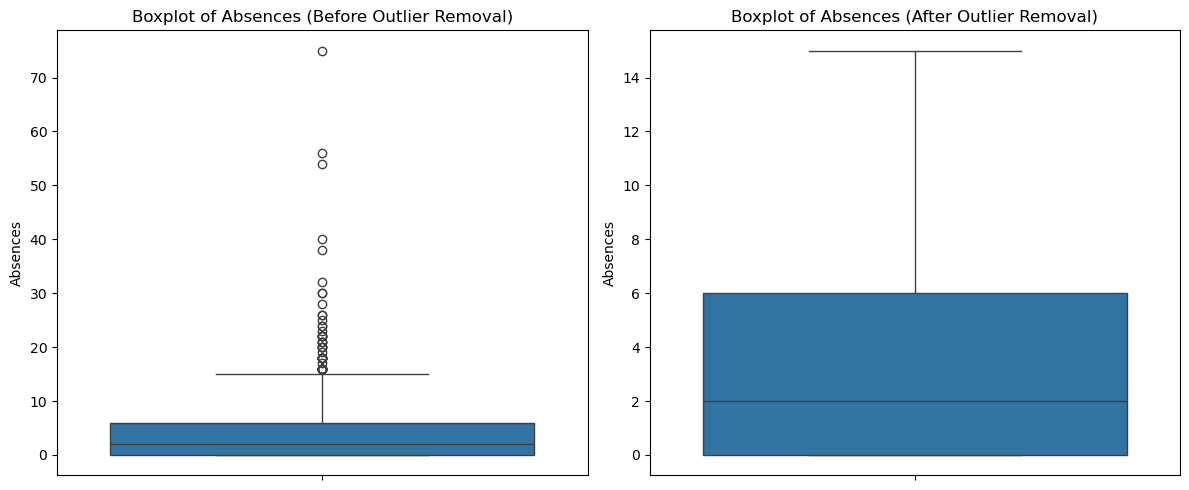

In [3]:
# Member 2: IT24103691 PEDURUHEWA H.N
# Preprocessing Technique: Outlier Removal
# Explanation: Outlier removal identifies and removes extreme values that deviate significantly from the rest of the data using 
# methods like the Interquartile Range (IQR) approach, improving model robustness and accuracy.
# Justification: The dataset (student performance, 1044 rows, 34 columns) contains numerical features like 'absences' with outliers 
# (e.g., up to 75), which can skew statistical analyses and machine learning models. Removing them ensures better data quality.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Select numerical columns for outlier analysis
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Outlier Removal (Boxplot to identify outliers)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['absences'])  # Focusing on 'absences' for clarity due to visible outliers
plt.title('Boxplot of Absences (Before Outlier Removal)')
plt.ylabel('Absences')

# Interpretation: The boxplot shows outliers in 'absences' (values above ~20), which could distort analyses.

# 2. Apply Outlier Removal (Using IQR method)
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['absences'] >= lower_bound) & (df['absences'] <= upper_bound)].copy()

# 3. Show Implementation Output (Rows before and after, and outlier count)
print("\n📋 ROWS BEFORE OUTLIER REMOVAL:", df.shape[0])
print("📋 ROWS AFTER OUTLIER REMOVAL:", df_no_outliers.shape[0])
print("📋 NUMBER OF OUTLIERS REMOVED:", df.shape[0] - df_no_outliers.shape[0])

# 4. EDA Visualization After Outlier Removal (Boxplot to confirm removal)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers['absences'])
plt.title('Boxplot of Absences (After Outlier Removal)')
plt.ylabel('Absences')

# Interpretation: The boxplot after removal shows no extreme values, indicating successful outlier elimination, 
# which should enhance model performance.
plt.tight_layout()
plt.show()

# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('outlier_removal_boxplot.png')


📋 DATASET AFTER NORMALIZATION (First 5 rows of numerical columns):
        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0  0.428571  1.00  1.00    0.333333   0.333333       0.0    0.75      0.50   
1  0.285714  0.25  0.25    0.000000   0.333333       0.0    1.00      0.50   
2  0.000000  0.25  0.25    0.000000   0.333333       1.0    0.75      0.50   
3  0.000000  1.00  0.50    0.000000   0.666667       0.0    0.50      0.25   
4  0.142857  0.75  0.75    0.000000   0.333333       0.0    0.75      0.50   

   goout  Dalc  Walc  health  absences        G1        G2    G3  
0   0.75  0.00  0.00     0.5  0.080000  0.263158  0.315789  0.30  
1   0.50  0.00  0.00     0.5  0.053333  0.263158  0.263158  0.30  
2   0.25  0.25  0.50     0.5  0.133333  0.368421  0.421053  0.50  
3   0.25  0.00  0.00     1.0  0.026667  0.789474  0.736842  0.75  
4   0.25  0.00  0.25     1.0  0.053333  0.315789  0.526316  0.50  


<Figure size 640x480 with 0 Axes>

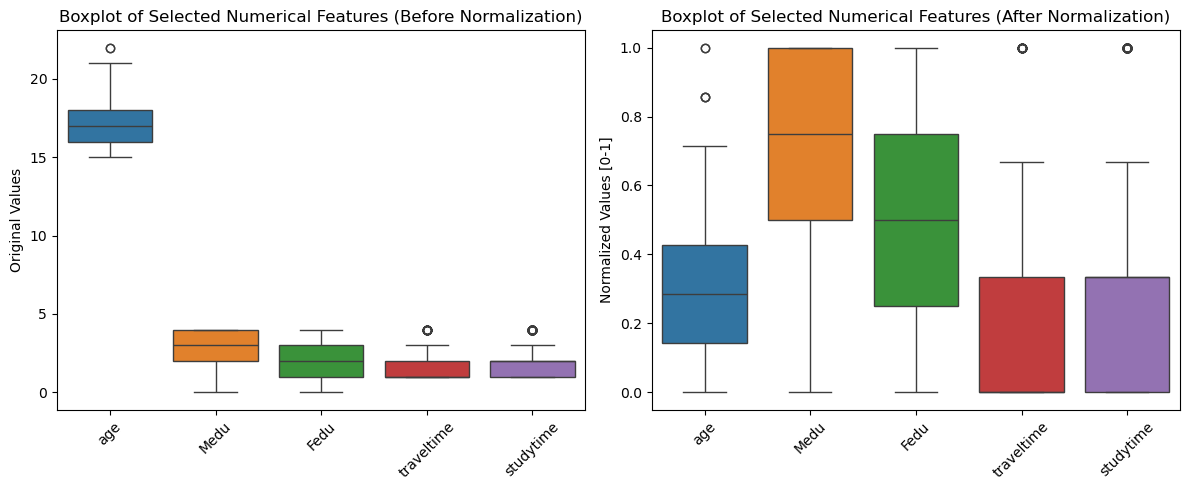

In [4]:
# Member 3:IT24103772 ANDISHAN.V
# Preprocessing Technique: Normalization (Min-Max Scaling)
# Explanation: Normalization transforms numerical features to a common scale, typically [0, 1], without distorting differences in ranges. 
# This is done using Min-Max Scaling: X_normalized = (X - X_min) / (X_max - X_min).
# Justification: In this dataset, numerical features have varying scales (e.g., 'age' ranges from 15-22, while 'absences' goes up to 75). 
# Normalizing them ensures that features contribute equally to machine learning models (e.g., distance-based algorithms like KNN or neural networks), 
# preventing features with larger ranges from dominating.

# Assume df_encoded is available from previous member (categorical encoding). If not, replace with df.
# We'll normalize only numerical columns (excluding binary/ordinal if not needed, but here we select key continuous ones).
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Normalization (e.g., Boxplot for selected features to show scale differences)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_encoded[numerical_columns[:5]])  # Showing first few for clarity
plt.title('Boxplot of Selected Numerical Features (Before Normalization)')
plt.xticks(rotation=45)
plt.ylabel('Original Values')

# Interpretation: The boxplot shows varying scales (e.g., 'age' around 15-20, 'Medu' 0-4). This disparity can bias models.

# 2. Apply Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# 3. Show Implementation Output (First 5 rows of normalized numerical columns)
print("\n📋 DATASET AFTER NORMALIZATION (First 5 rows of numerical columns):")
print(df_normalized[numerical_columns].head())

# 4. EDA Visualization After Normalization
plt.subplot(1, 2, 2)
sns.boxplot(data=df_normalized[numerical_columns[:5]])
plt.title('Boxplot of Selected Numerical Features (After Normalization)')
plt.xticks(rotation=45)
plt.ylabel('Normalized Values [0-1]')

# Interpretation: After normalization, all features are scaled to [0,1], preserving distributions but making ranges comparable. 
# This improves model performance by treating features equally.
plt.tight_layout()
plt.show()


📋 DATASET AFTER SCALING (First 5 rows of numerical columns):
        age      Medu      Fedu  traveltime  studytime  failures    famrel  \
0  1.027889  1.242077  1.466302    0.652210   0.035606 -0.403106  0.068788   
1  0.221035 -1.426089 -1.262431   -0.715074   0.035606 -0.403106  1.140653   
2 -1.392674 -1.426089 -1.262431   -0.715074   0.035606  4.171268  0.068788   
3 -1.392674  1.242077 -0.352853   -0.715074   1.234713 -0.403106 -1.003076   
4 -0.585820  0.352689  0.556724   -0.715074   0.035606 -0.403106  0.068788   

   freetime     goout      Dalc      Walc    health  absences        G1  \
0 -0.195099  0.732511 -0.542374 -0.999995 -0.381387  0.252155 -2.083727   
1 -0.195099 -0.135527 -0.542374 -0.999995 -0.381387 -0.070060 -2.083727   
2 -0.195099 -1.003566  0.554987  0.557044 -0.381387  0.896584 -1.413029   
3 -1.165019 -1.003566 -0.542374 -0.999995  1.023086 -0.392275  1.269766   
4 -0.195099 -1.003566 -0.542374 -0.221475  1.023086 -0.070060 -1.748378   

         G2       

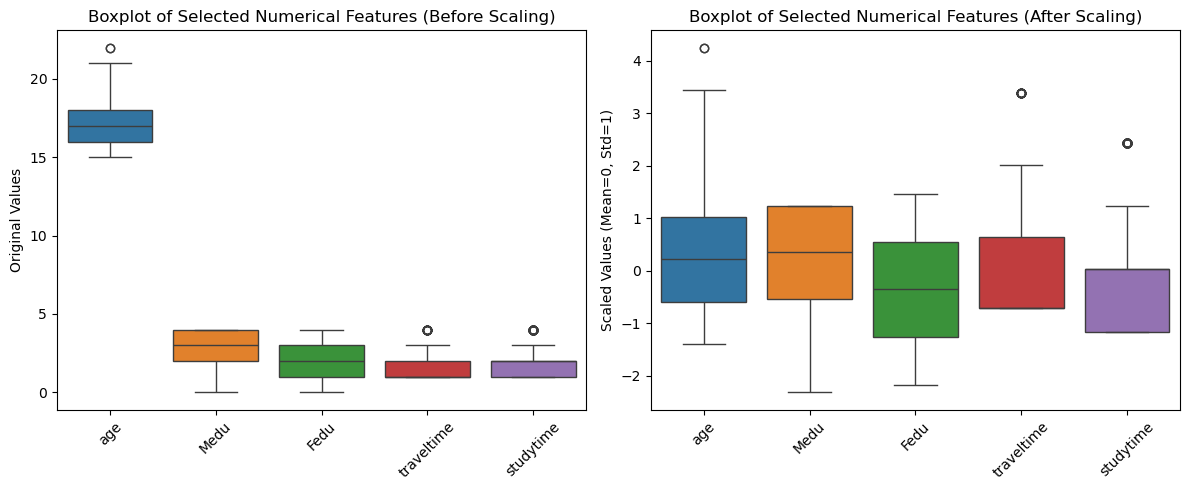

In [5]:
# Member 4: IT24103791 RUWANTHIKA P.D.S
# Preprocessing Technique: Scaling (Standardization)
# Explanation: Scaling, specifically standardization, transforms numerical data to have a mean of 0 and a standard deviation of 1 
# using the formula Z = (X - mean) / standard_deviation. This is useful for algorithms sensitive to feature magnitude, like SVM or linear regression.
# Justification: The dataset contains numerical features (e.g., 'age', 'absences') with varying distributions and scales. Standardization 
# ensures all features are on the same statistical scale, improving model convergence and performance.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Select numerical columns for scaling
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Scaling (Boxplot to show distribution differences)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numerical_columns[:5]])  # Showing first few for clarity
plt.title('Boxplot of Selected Numerical Features (Before Scaling)')
plt.xticks(rotation=45)
plt.ylabel('Original Values')

# Interpretation: The boxplot shows varying distributions (e.g., 'age' centered around 16-18, 'absences' with outliers up to 75), 
# which could affect model training if not standardized.

# 2. Apply Scaling
scaler = StandardScaler()
df_scaled = df.copy()  # Create a copy to avoid modifying the original
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 3. Show Implementation Output (First 5 rows of scaled numerical columns)
print("\n📋 DATASET AFTER SCALING (First 5 rows of numerical columns):")
print(df_scaled[numerical_columns].head())

# 4. EDA Visualization After Scaling
plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled[numerical_columns[:5]])
plt.title('Boxplot of Selected Numerical Features (After Scaling)')
plt.xticks(rotation=45)
plt.ylabel('Scaled Values (Mean=0, Std=1)')

# Interpretation: After scaling, the features have a mean near 0 and standard deviation of 1, as seen in the boxplot, 
# making them suitable for algorithms requiring standardized inputs.
plt.tight_layout()
plt.show()

# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('scaling_boxplot.png')

<Figure size 640x480 with 0 Axes>

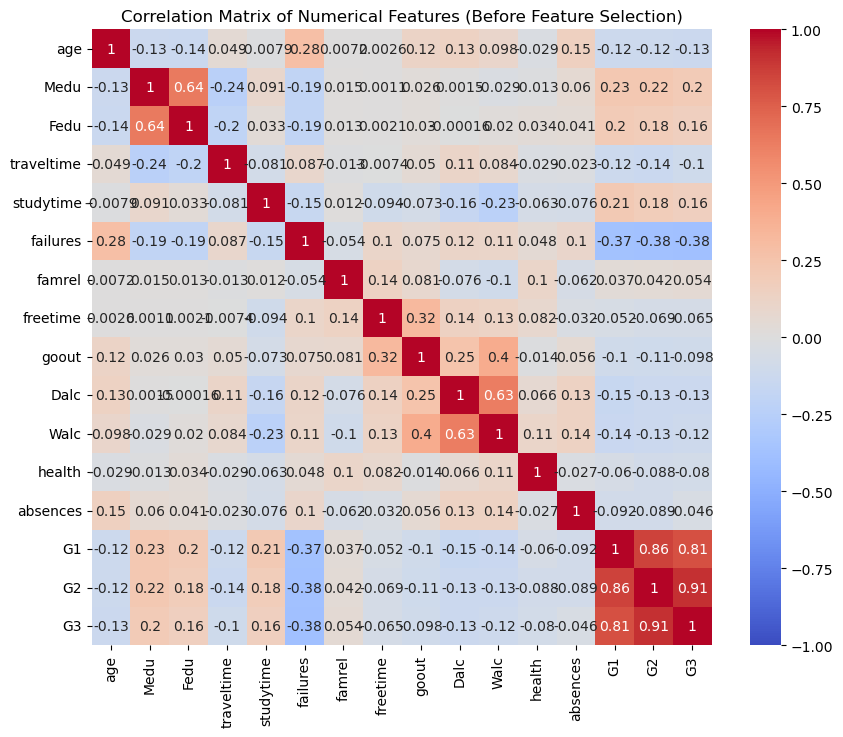


📋 DROPPED FEATURES (Correlation > 0.8): ['G2', 'G3']

📋 DATASET AFTER FEATURE SELECTION (First 5 rows of remaining features):
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  
0     1     1       3         6   5  
1     1     1       3         4   5  
2     2     3       3        10   7  
3     1     1       5         2  15  
4     1     2       5         4   6  


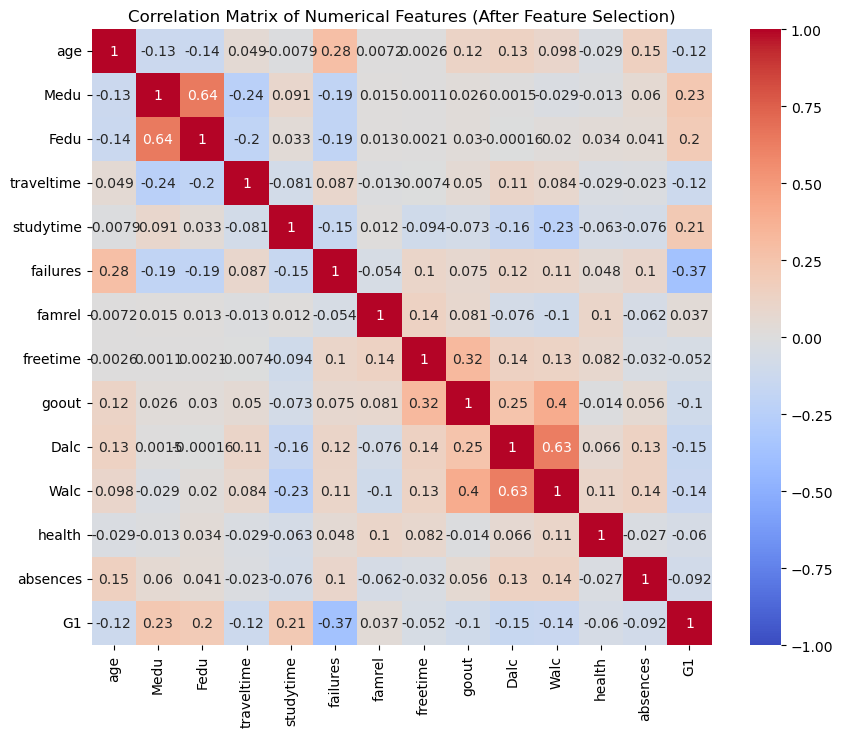

In [6]:
# Member 5:IT24103692 MADUSANKA I.I.T
# Preprocessing Technique: Feature Selection (Using Correlation-Based Method)
# Explanation: Feature selection involves choosing the most relevant features to reduce dimensionality and improve model performance 
# by removing redundant or less informative variables. Here, we use correlation analysis to identify and drop highly correlated features.
# Justification: The dataset (student performance with 34 columns) may contain correlated features (e.g., 'G1', 'G2', 'G3' grades), 
# which can lead to multicollinearity in models like linear regression. Selecting key features improves efficiency and interpretability.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Encode categorical variables to proceed with correlation (using LabelEncoder as a simple approach)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Select numerical columns for correlation analysis
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Feature Selection (Correlation Matrix)
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features (Before Feature Selection)')
plt.show()

# Interpretation: The correlation matrix shows high correlations (e.g., 'G1', 'G2', 'G3' are strongly correlated, >0.8), 
# indicating redundancy that can be reduced through feature selection.

# 2. Apply Feature Selection (Remove highly correlated features)
# Set a threshold (e.g., 0.8) to drop one of a pair of highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
df_selected = df[numerical_columns].drop(to_drop, axis=1)

# 3. Show Implementation Output (List of dropped features and first 5 rows of selected features)
print("\n📋 DROPPED FEATURES (Correlation > 0.8):", to_drop)
print("\n📋 DATASET AFTER FEATURE SELECTION (First 5 rows of remaining features):")
print(df_selected.head())

# 4. EDA Visualization After Feature Selection (Updated Correlation Matrix)
plt.figure(figsize=(10, 8))
correlation_matrix_selected = df_selected.corr()
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features (After Feature Selection)')
plt.show()

# Interpretation: The updated matrix shows reduced correlation between remaining features, confirming effective selection 
# and improved model readiness by eliminating redundancy.
# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('feature_selection_correlation.png')

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

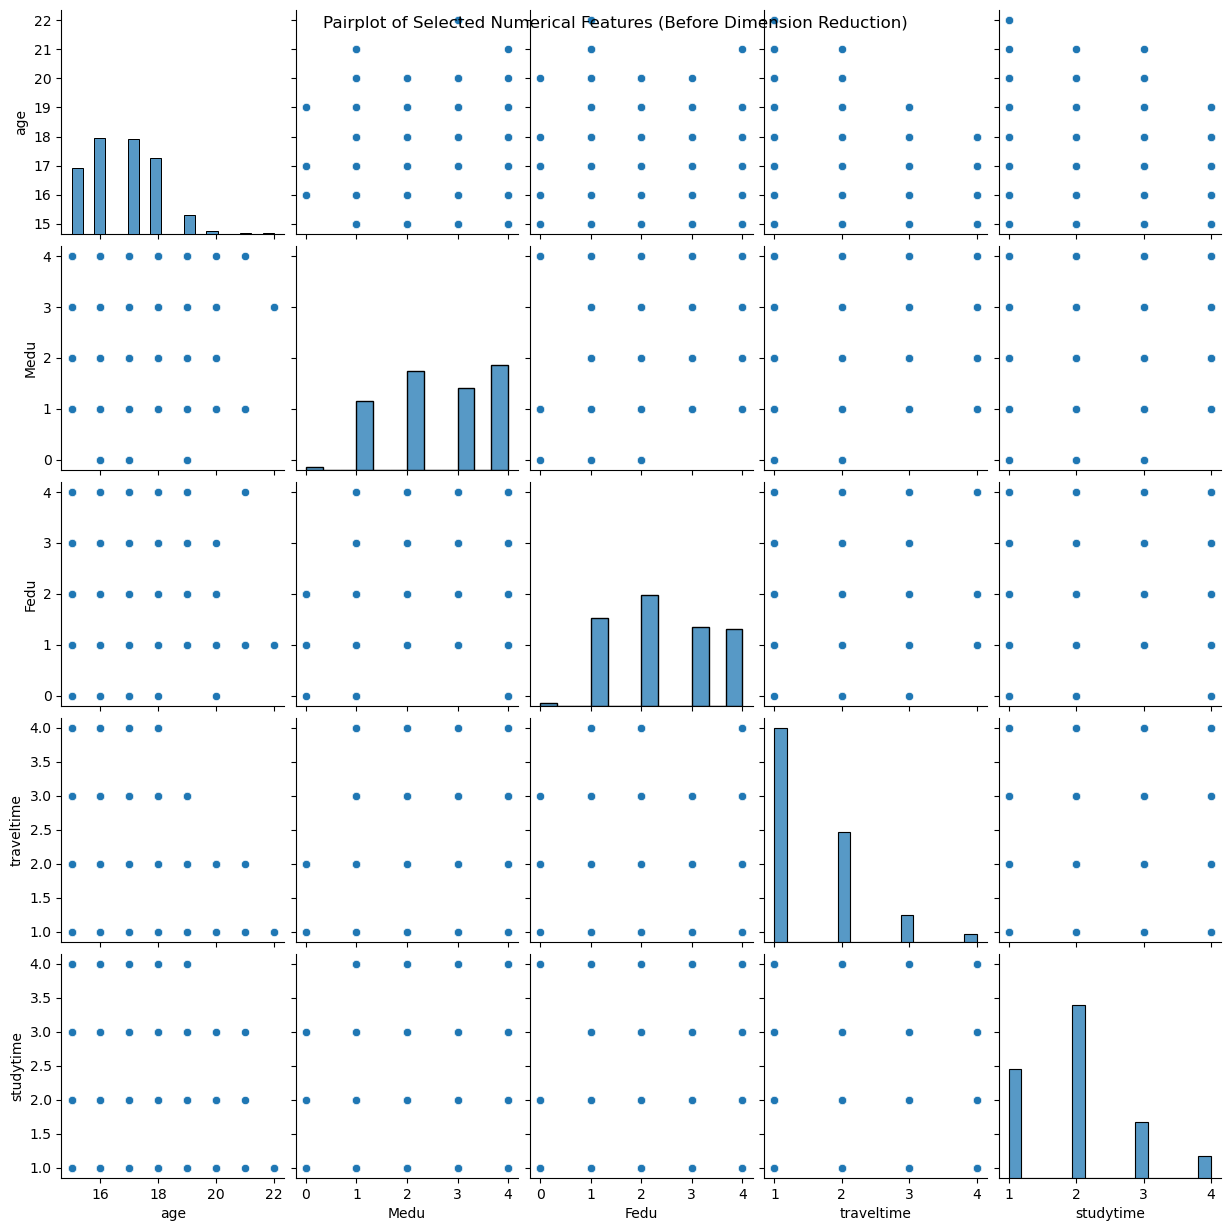


📋 EXPLAINED VARIANCE RATIO BY COMPONENT:
[0.21809957 0.12359213 0.0956193  0.08112514 0.070782  ]

📋 DATASET AFTER DIMENSION REDUCTION (First 5 rows of PCA components):
        PC1       PC2       PC3       PC4       PC5
0 -1.656156 -0.300391  2.534956 -0.188933  0.787587
1 -2.415487 -2.316375  0.571902  0.925266  0.489598
2 -2.874750 -1.162872 -0.261007 -0.679323  0.329347
3  2.743710 -0.995303  0.686515 -0.533992 -0.928722
4 -0.367464 -0.744112  1.843080  0.305950 -0.660117


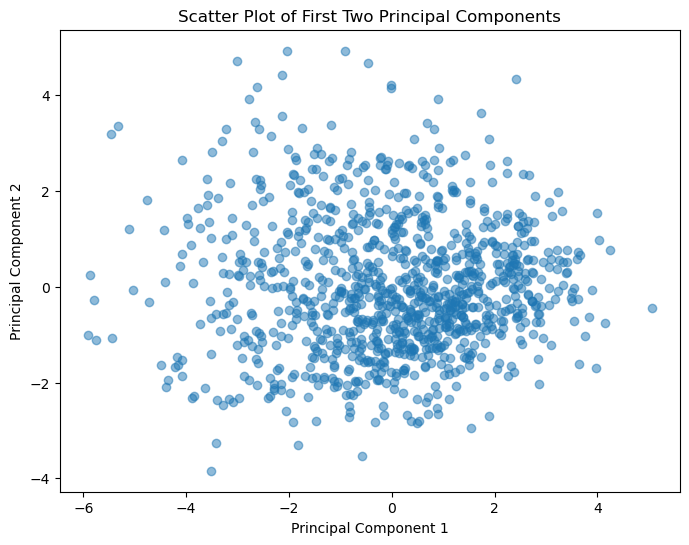

In [7]:
# Member 6 :IT24103642 DE SILVA
# Preprocessing Technique: Dimension Reduction (Principal Component Analysis - PCA)
# Explanation: Dimension reduction reduces the number of features while retaining most of the data's variance using techniques 
# like Principal Component Analysis (PCA). PCA transforms the original features into a new set of uncorrelated principal components.
# Justification: The dataset has 34 columns, including correlated features (e.g., 'G1', 'G2', 'G3'), leading to high dimensionality. 
# PCA reduces this to a smaller set of components, improving computational efficiency and model performance.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# Encode categorical variables for PCA (numerical data required)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Select numerical columns for PCA
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
                     'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

# 1. EDA Visualization Before Dimension Reduction (Pairplot of selected features)
plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_columns[:5]])  # Showing first few for clarity
plt.suptitle('Pairplot of Selected Numerical Features (Before Dimension Reduction)')
plt.show()

# Interpretation: The pairplot shows correlations and distributions (e.g., 'G1' vs 'G2'), indicating redundancy that PCA can address.

# 2. Prepare data for PCA (Standardize features as PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 components for illustration (adjust based on explained variance)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for easier handling
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(5)])

# 3. Show Implementation Output (Explained variance ratio and first 5 rows of PCA components)
print("\n📋 EXPLAINED VARIANCE RATIO BY COMPONENT:")
print(pca.explained_variance_ratio_)
print("\n📋 DATASET AFTER DIMENSION REDUCTION (First 5 rows of PCA components):")
print(pca_df.head())

# 4. EDA Visualization After Dimension Reduction (Scatter plot of first two PCs)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation: The scatter plot of PC1 vs PC2 shows reduced dimensionality while retaining variance. The explained variance 
# ratio indicates how much information is preserved (e.g., if sum > 0.9, 90% of variance is retained).
# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('dimension_reduction_scatter.png')